## ¿Qué es Scikit-Learn?
Es una biblioteca de Python que proporciona acceso a versiones eficaces de muchos algoritmos comunes. También proporciona una API propia y estandarizada.

> Para la instalación de la biblioteca:<br>**%conda install conda-forge::scikit-learn**

1) Descomprimido del archivo comprimido

In [4]:
# import tarfile
# fichero = "archivos_comprimidos/housing.tgz"
# 
# f = tarfile.open(fichero)
# f.extractall(path="archivos_comprimidos/")
# f.close()

2) Lectura del fichero CSV

In [5]:
import pandas as pd
archivo = "C:\\Users\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\Sistemas de Aprendizaxe Automático\\archivos_comprimidos\\housing.csv"
datos = pd.read_csv(archivo)

In [6]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
len(datos)

20640

¿Cuántos valores distintos hay de la columna "ocean_priximity"?

In [9]:
datos["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Histogramas
- **bins** -> Divisiones en los histogramas
<br>
- **figsize** -> Para cambiar el tamaño de las figuras y se vea más claro

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

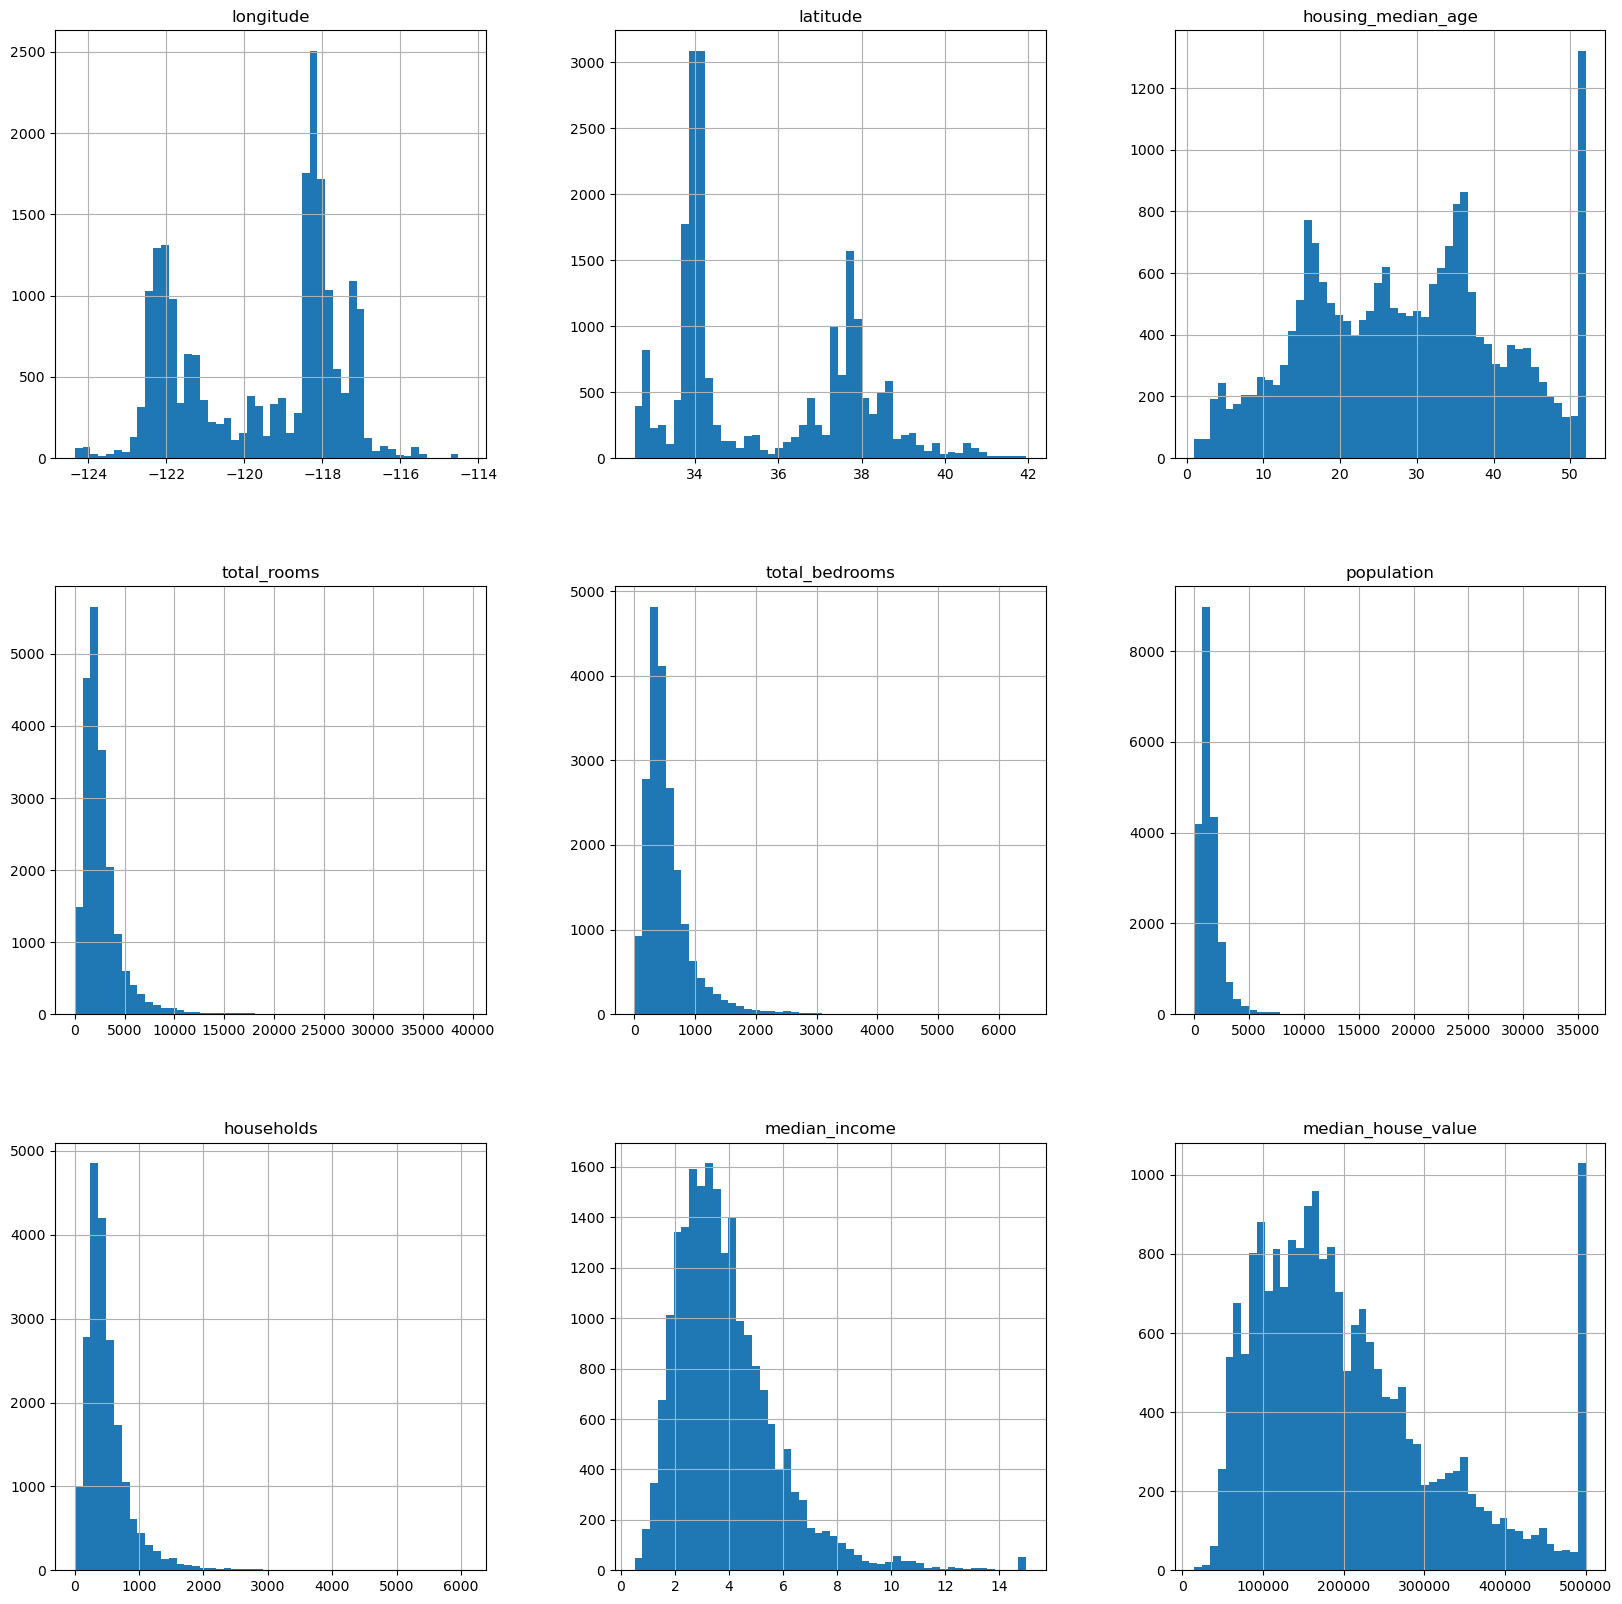

In [11]:
datos.hist(bins=50,figsize=(20,20)) 

- **alpha**: Tranparencia de los puntos
- **s**: Para el tamaño de los puntos según los datos de una columna que se le proponga.
- **c**: Para el color de los puntos según los datos de una columna que se le proponga 

<Axes: xlabel='longitude', ylabel='latitude'>

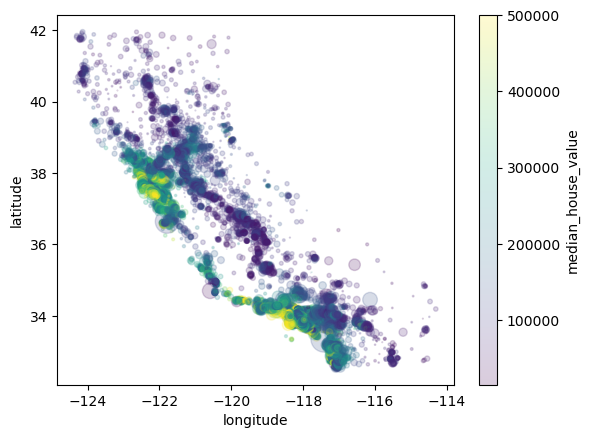

In [12]:
datos.plot(kind="scatter", 
           x= "longitude", 
           y = "latitude", 
           alpha = 0.2,
           s=datos["population"]/100,
           c="median_house_value")   # Se divide entre 100 para que no salgan muy grandes

In [13]:
# !pip install pillow
# !pip install basemap
# !pip install basemap-data-hires

Sobreponer los puntos encima del mapa:

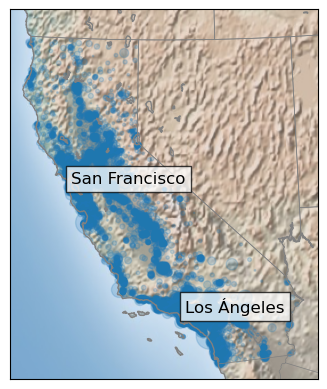

In [14]:
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='lcc',
            resolution='h',
            lat_0=37.5,
            lon_0=-119,
            width=1E6,
            height=1.2E6)

m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

m.scatter( datos["longitude"], datos["latitude"],
           alpha=0.2,
           latlon=True,
           s=datos["population"]/100,)

x, y = m(-118.243683, 34.052235)
plt.text(x, y, 'Los Ángeles', fontsize=12, bbox=dict(facecolor="white", alpha=0.75));

x, y = m(-122.431297, 37.773972)
plt.text(x, y, 'San Francisco', fontsize=12, bbox=dict(facecolor="white", alpha=0.75));


In [15]:
datos2 = datos.copy()
datos2 = datos2.drop("ocean_proximity", axis=1)
corr_matrix = datos2.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

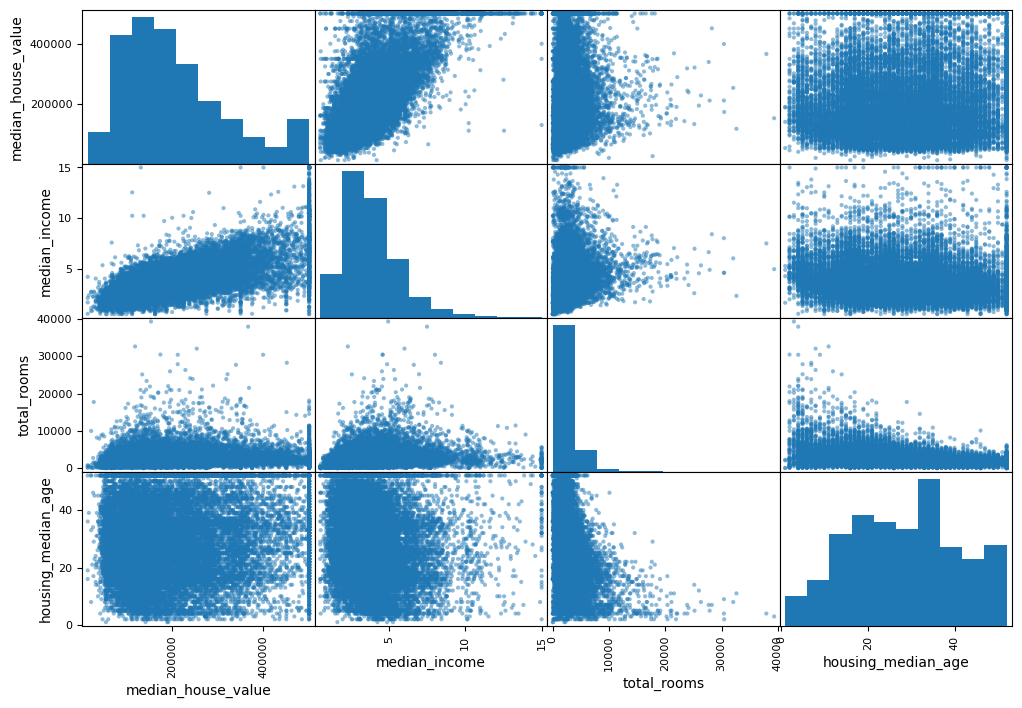

In [16]:
from pandas.plotting import scatter_matrix
atributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(datos[atributes], figsize=(12,8))

In [17]:
datos2["rooms_per_household"] = datos2["total_rooms"]/datos2["households"]
datos2["bedrooms_per_rooms"] = datos2["total_bedrooms"]/datos2["total_rooms"]
datos2["population_per_household"] = datos2["population"]/datos2["households"]

In [18]:
corr_matrix = datos2.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_rooms         -0.255880
Name: median_house_value, dtype: float64

<Axes: xlabel='bedrooms_per_rooms', ylabel='median_house_value'>

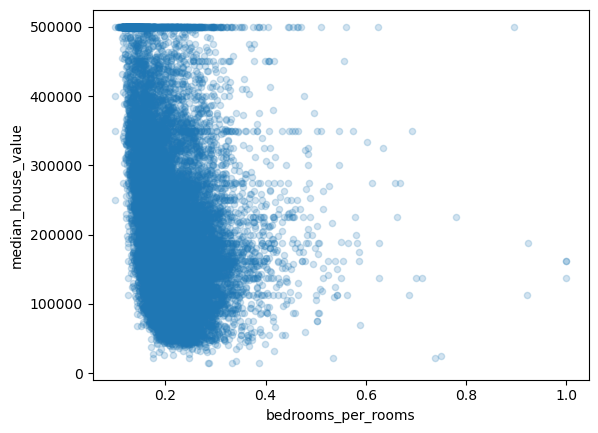

In [19]:
datos2.plot(kind="scatter", x="bedrooms_per_rooms", y="median_house_value", alpha=0.2)

> Trabajos de limpieza y acondicionamiento de datos

<Axes: >

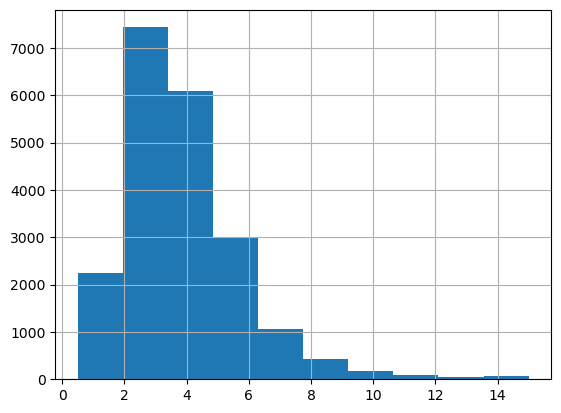

In [20]:
datos["median_income"].hist()

In [21]:
import numpy as np
datos["income_cat"] = pd.cut(datos["median_income"],
                             bins=[0.0, 1.5, 3, 4.5, 6, np.inf],
                             labels=[1,2,3,4,5])

In [22]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [23]:
datos["income_cat"] = pd.to_numeric(datos["income_cat"])
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  income_cat          20640 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


<Axes: >

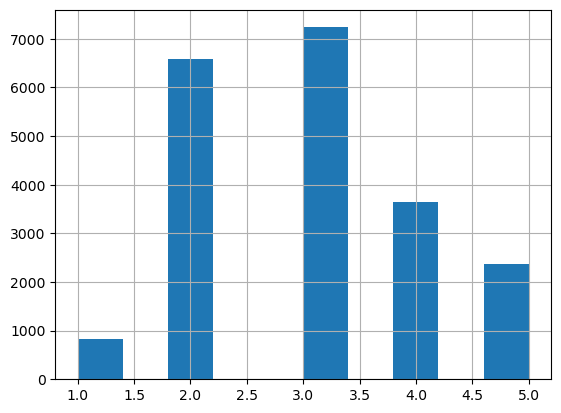

In [24]:
datos["income_cat"].hist()

In [25]:
datos["income_cat"].value_counts()/len(datos)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [26]:
media = datos["total_bedrooms"].median()

# Rellenar los valores que están vacíos por ese valor.
datos["total_bedrooms"].fillna(media, inplace=True)

In [27]:
housing_cat = datos[["ocean_proximity"]]
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
Name: count, dtype: int64

In [28]:
# si ordenados:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
housing_cat_encoded = oe.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [29]:
oe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [30]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_hot = cat_encoder.fit_transform(housing_cat)
housing_cat_hot

c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [31]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [32]:
col_aux = [cat for cat in cat_encoder.categories_[0]]

daux = pd.DataFrame(housing_cat_hot, columns = col_aux)
daux

datos3 = datos.copy()

datos3 = datos3.join(daux)
datos3 = datos3.drop(["ocean_proximity"], axis=1)
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  income_cat          20640 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


In [33]:
# Barajar los casos y repartirlos entre los de entrenamientos y los tests
def split_train_test(data, test_radio):
    indices = np.random.permutation(len(data))
    lg_test = int(len(data) * test_radio)
    test_indices = indices[:lg_test]
    train_indices = indices[lg_test:]

            # Los de ENTRENAMIENTO      # Los de TEST
    return data.iloc[train_indices], data.iloc[test_indices]

# Para la próxima vez que se repita el random después del seed van a ser los mismos:
np.random.seed(42)

datos_train, datos_test = split_train_test(datos3, 0.2)
len(datos_train), len(datos_test)

(16512, 4128)

In [34]:
y_train = datos_train["median_house_value"].copy()  #Hago una copia para no influir en las columnas del original
x_train = datos_train.drop("median_house_value",axis=1)

In [35]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   income_cat          16512 non-null  int64  
 9   <1H OCEAN           16512 non-null  float64
 10  INLAND              16512 non-null  float64
 11  ISLAND              16512 non-null  float64
 12  NEAR BAY            16512 non-null  float64
 13  NEAR OCEAN          16512 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 1.9 MB


# Entrenamiento de modelo
## Regresión lineal

In [36]:
y_train = datos_train["median_house_value"].copy()
x_train = datos_train.drop("median_house_value", axis=1)
x_train = datos_train[["housing_median_age", "total_rooms", "median_income"]]

In [37]:
from sklearn.linear_model import LinearRegression

# Creamos el modelo
lin_reg = LinearRegression()

# Pasamos los datos
lin_reg.fit(x_train, y_train)

LinearRegression()

In [38]:
# Probamos las predicciones de algunos de sus datos para ver si no es disparatado 
datos_prueba = x_train.iloc[:5]
print(f"Predicciones: ", lin_reg.predict(datos_prueba))
y_reales = y_train.iloc[:5]
print("Reales: ", list(y_reales))


Predicciones:  [191241.19032347 247421.98530848 167458.91940355 134423.69271645
 220699.12183606]
Reales:  [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]


## Modelo de regresión lineal de varias variables

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predicciones = lin_reg.predict(x_train)
mse = mean_squared_error(y_train, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_train, predicciones)
score = r2_score(y_train, predicciones)
print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

# con todas las columnas mae: 49704.12411854149   mse: 68235.55069803342

mae: 59986.95523463257   rmse: 80335.34309584109 r2_score: 0.5172148009737971


## Regresión Decisión Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

predicciones = tree_reg.predict(x_train)
mse = mean_squared_error(y_train, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_train, predicciones)
score = r2_score(y_train, predicciones)
print(f"mae: {mae}   rmse: {mse} r2_score: {score}")


mae: 0.0   rmse: 0.0 r2_score: 1.0


In [41]:
y_test = datos_test["median_house_value"].copy()
x_test = datos_test.drop("median_house_value", axis=1)
x_test = datos_test[["housing_median_age", "total_rooms", "median_income"]]

predicciones = tree_reg.predict(x_test)
mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicciones)
score = r2_score(y_test, predicciones)
print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

mae: 79749.89244186046   rmse: 109820.45553929616 r2_score: 0.07963600256702663


In [42]:
x_train

,housing_median_age,total_rooms,median_income
14196,33.0,3126.0,3.2596
8267,49.0,3382.0,3.8125
17445,4.0,1897.0,4.1563
14265,36.0,1421.0,1.9425
2271,43.0,2382.0,3.5542
...,...,...,...
11284,35.0,1330.0,6.3700
11964,33.0,3084.0,3.0500
5390,36.0,2101.0,2.9344
860,15.0,3575.0,5.7192


In [43]:
# cross-validation arbol decision
from sklearn.model_selection import cross_val_score

lin_score = cross_val_score(tree_reg, x_train, y_train,
                            scoring = "neg_mean_squared_error", cv=10)
root_lin_score = np.sqrt(-lin_score)
print("Scores: ", root_lin_score)
print("Media: ", root_lin_score.mean())
print("Desviación Std", root_lin_score.std())

Scores:  [110277.73425958 110916.78935776 107487.69801765 109756.24939645
 110628.75584276 112096.61489884 108119.64667903 114592.53650052
 105454.92292293 111068.14525788]
Media:  110039.90931334005
Desviación Std 2418.464287774568


## Random Forest Regressor
Son como muchos árboles de decisión

In [44]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100)

rf_reg.fit(x_train, y_train)

rf_score = cross_val_score(rf_reg, x_train, y_train,
                            scoring = "neg_mean_squared_error", cv=10)
root_lin_score = np.sqrt(-lin_score)
print("Scores: ", root_lin_score)
print("Media: ", root_lin_score.mean())
print("Desviación Std", root_lin_score.std())
predicciones = rf_reg.predict(x_test)
mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicciones)
score = r2_score(y_test, predicciones)
print(f"mae: {mae}   rmse: {mse} r2_score: {score}")



Scores:  [110277.73425958 110916.78935776 107487.69801765 109756.24939645
 110628.75584276 112096.61489884 108119.64667903 114592.53650052
 105454.92292293 111068.14525788]
Media:  110039.90931334005
Desviación Std 2418.464287774568
mae: 59558.54631540697   rmse: 80370.70864907478 r2_score: 0.5070660445698667


### SVM

In [45]:
# regresión SVM
from sklearn.svm import SVR

sv_reg = SVR()

sv_reg.fit(x_train, y_train)

predicciones = sv_reg.predict(x_test)
mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicciones)
score = r2_score(y_test, predicciones)
print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

rf_score = cross_val_score(sv_reg, x_train, y_train,
                            scoring = "neg_mean_squared_error", cv=10)
root_lin_score = np.sqrt(-rf_score)
print("SV cross")
print("Scores: ", root_lin_score)
print("Media: ", root_lin_score.mean())
print("Desviación Std", root_lin_score.std())


mae: 87331.8066102977   rmse: 117216.47266183165 r2_score: -0.048504832569613354
SV cross
Scores:  [119578.50018053 121535.72011552 119674.56630405 114660.8202692
 118428.24411197 119892.80419359 116190.27036869 117003.49428274
 119811.02609153 120326.91812837]
Media:  118710.23640461739
Desviación Std 2015.726291686881


### XGB

In [46]:
# regresión xgboost
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objetive="reg:squarederror")

xgb_reg.fit(x_train, y_train)

predicciones = xgb_reg.predict(x_test)
mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicciones)
score = r2_score(y_test, predicciones)
print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

rf_score = cross_val_score(xgb_reg, x_train, y_train,
                            scoring = "neg_mean_squared_error", cv=10)
root_lin_score = np.sqrt(-rf_score)
print("XGB cross")
print("Scores: ", root_lin_score)
print("Media: ", root_lin_score.mean())
print("Desviación Std", root_lin_score.std())

c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\xgboost\core.py:160: UserWarning: [16:28:32] WARNING: D:\bld\xgboost-split_1705650032250\work\src\learner.cc:742: 
Parameters: { "objetive" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\xgboost\core.py:160: UserWarning: [16:28:32] WARNING: D:\bld\xgboost-split_1705650032250\work\src\learner.cc:742: 
Parameters: { "objetive" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\xgboost\core.py:160: UserWarning: [16:28:32] WARNING: D:\bld\xgboost-split_1705650032250\work\src\learner.cc:742: 
Parameters: { "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


mae: 58478.35489104515   rmse: 79649.54062244536 r2_score: 0.5158725690446


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\xgboost\core.py:160: UserWarning: [16:28:32] WARNING: D:\bld\xgboost-split_1705650032250\work\src\learner.cc:742: 
Parameters: { "objetive" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\xgboost\core.py:160: UserWarning: [16:28:32] WARNING: D:\bld\xgboost-split_1705650032250\work\src\learner.cc:742: 
Parameters: { "objetive" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\xgboost\core.py:160: UserWarning: [16:28:32] WARNING: D:\bld\xgboost-split_1705650032250\work\src\learner.cc:742: 
Parameters: { "objetive" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\xgboost\core.py:160: UserWarning: [16:28:32] WARNING: D:\bld\xgboost-split_1705650032250\work\src\le

XGB cross
Scores:  [77952.44696766 81415.5972459  78293.3204073  78764.02827067
 81632.17558819 79572.86814444 76084.84819743 80538.3178262
 79104.72711521 81001.93416437]
Media:  79436.02639273775
Desviación Std 1665.1165765106127


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\xgboost\core.py:160: UserWarning: [16:28:33] WARNING: D:\bld\xgboost-split_1705650032250\work\src\learner.cc:742: 
Parameters: { "objetive" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\xgboost\core.py:160: UserWarning: [16:28:33] WARNING: D:\bld\xgboost-split_1705650032250\work\src\learner.cc:742: 
Parameters: { "objetive" } are not used.

  warnings.warn(smsg, UserWarning)
